In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:

df1 = pd.read_csv('data/aircraft_data.csv', delimiter=';', encoding='latin1')
df1.head()

,model,msn,ln,ac_type,airline,first_flight,registration,status
0,Airbus A220,50001,NaN,CS100,Bombardier,16.09.2013,C-FBCS,Active
1,Airbus A220,50002,NaN,CS100,Bombardier,03.01.2014,C-GWYD,Active
2,Airbus A220,50003,NaN,CS100,Bombardier,04.03.2014,C-GWXJ,Stored
3,Airbus A220,50004,NaN,CS100,Bombardier,18.05.2014,C-GWXK,Scrapped
4,Airbus A220,50005,NaN,CS100,Bombardier,04.07.2013,C-GWXZ,Active


In [22]:
df2 = df1[(df1["airline"] == "Cathay Pacific") & (df1["status"] == "Active")]
df2

,model,msn,ln,ac_type,airline,first_flight,registration,status
11395,Airbus A321,9228,NaN,321-251NX,Cathay Pacific,04.11.2020,B-HPB,Active
11544,Airbus A321,10091,NaN,321-251NX,Cathay Pacific,23.11.2020,B-HPD,Active
11577,Airbus A321,10171,NaN,321-251NX,Cathay Pacific,01.04.2021,B-HPE,Active
11586,Airbus A321,10187,NaN,321-251NX,Cathay Pacific,05.05.2022,B-HPF,Active
11589,Airbus A321,10191,NaN,321-251NX,Cathay Pacific,25.05.2021,B-HPG,Active
...,...,...,...,...,...,...,...,...
32269,Boeing 777,42144,1246.0,777-367ER,Cathay Pacific,03.10.2014,B-KQS,Active
32270,Boeing 777,42145,1263.0,777-367ER,Cathay Pacific,05.12.2014,B-KQU,Active
32465,Boeing 777,60723,1319.0,777-367ER,Cathay Pacific,30.06.2015,B-KQZ,Active
32466,Boeing 777,60724,1333.0,777-367ER,Cathay Pacific,20.08.2015,B-HNR,Active


In [23]:
n = df2.shape[0]
n


161

95 66


C:\Users\yuhan\AppData\Local\Temp\ipykernel_53008\2044831480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["company"]= np.where(df2["model"].str.contains("Airbus"), "Airbus",


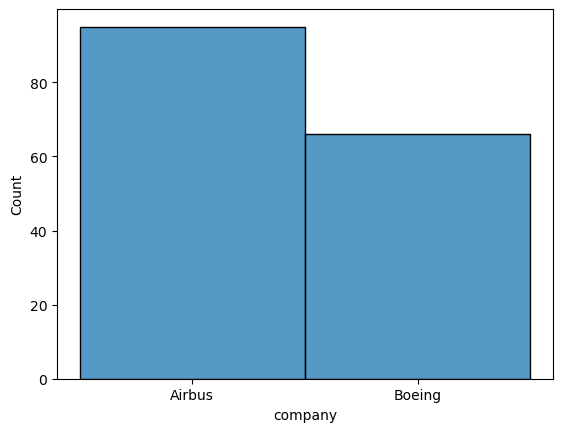

In [30]:
dairbus=df2[df2["model"].str.contains("Airbus")]
a=dairbus.shape[0]
dboeing=df2[df2["model"].str.contains("Boeing")]
b=dboeing.shape[0]
print(a,b)

df2["company"]= np.where(df2["model"].str.contains("Airbus"), "Airbus", 
                           np.where(df2["model"].str.contains("Boeing"), "Boeing", "Other"))

sns.histplot(data=df2, x="company", bins=n)
plt.show()




C:\Users\yuhan\AppData\Local\Temp\ipykernel_53008\3983651007.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["company"]= np.where(df5["model"].str.contains("Airbus"), "Airbus",
C:\Users\yuhan\AppData\Local\Temp\ipykernel_53008\3983651007.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df5, x="airline", y="counts", hue="company", ci=None)


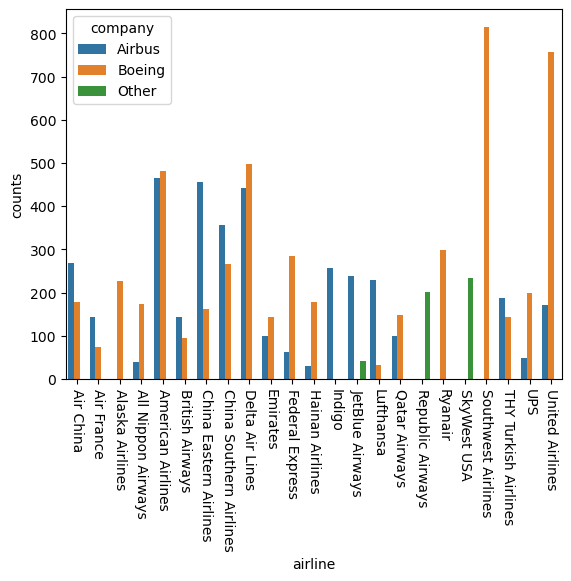

In [ ]:
df1["company"]= np.where(df1["model"].str.contains("Airbus"), "Airbus", 
                           np.where(df1["model"].str.contains("Boeing"), "Boeing", "Other"))
df1

df3=df1[(df1["status"] == "Active")]
df3



df3=df3.groupby(['airline']).size().reset_index(name='counts')
df4=df3[df3["counts"]>200]

df4=df4.sort_values(by='counts', ascending=False)
df4

df5=df1[df1["airline"].isin(df4["airline"])]
df5["company"]= np.where(df5["model"].str.contains("Airbus"), "Airbus", 
                           np.where(df5["model"].str.contains("Boeing"), "Boeing", "Other"))
df5

df5=df5[df5["status"] == "Active"]
df5

df5=df5.groupby(['airline', 'company']).size().reset_index(name='counts')


sns.barplot(data=df5, x="airline", y="counts", hue="company", ci=None,)

plt.xticks(rotation=270)
plt.show()

C:\Users\yuhan\AppData\Local\Temp\ipykernel_53008\3205350628.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df5, x="airline", y="proportion", hue="company", ci=None)


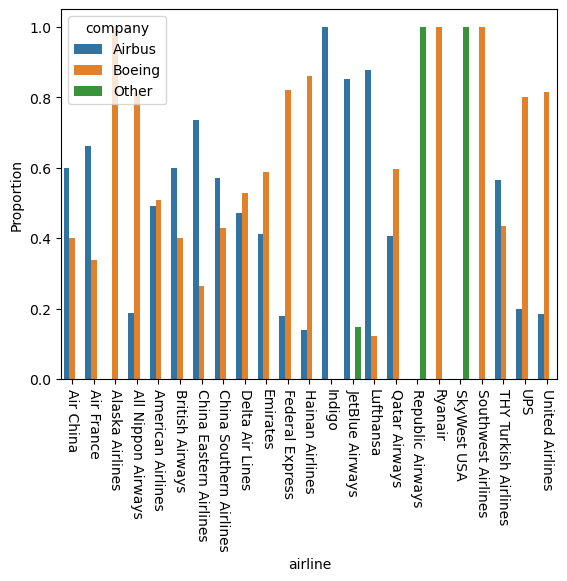

In [47]:
# ...existing code...

# Calculate total counts per airline for normalization
df5['total'] = df5.groupby('airline')['counts'].transform('sum')
df5['proportion'] = df5['counts'] / df5['total']

# Plot normalized proportions
sns.barplot(data=df5, x="airline", y="proportion", hue="company", ci=None)
plt.xticks(rotation=270)
plt.ylabel("Proportion")
plt.show()

# ...existing code...

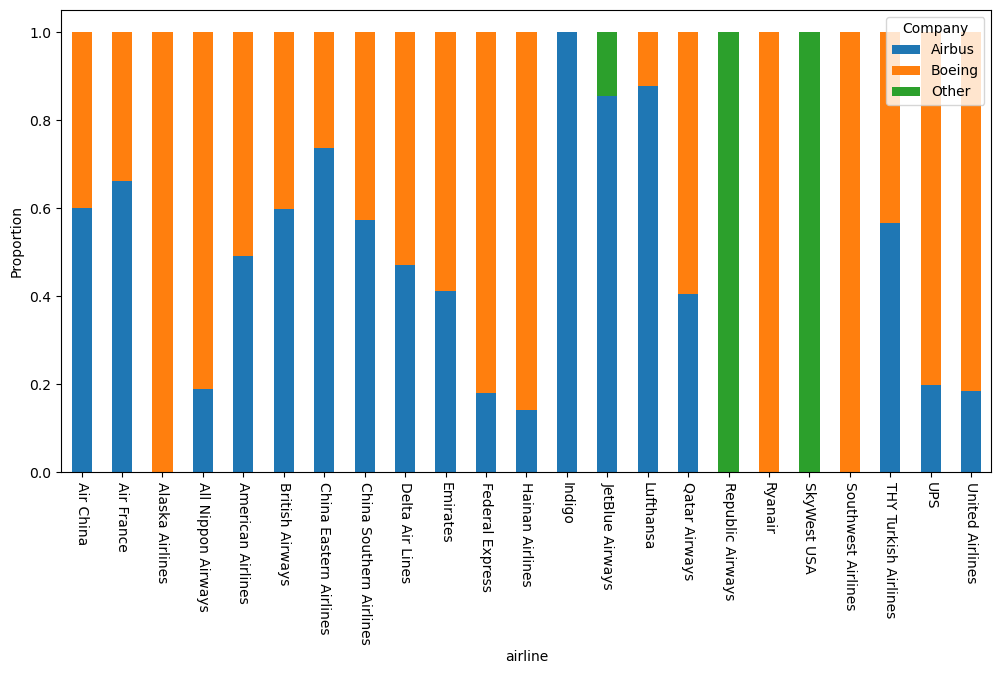

In [48]:
# ...existing code...

# Pivot the data for stacked bar plot
pivot_df = df5.pivot(index='airline', columns='company', values='proportion').fillna(0)

# Plot stacked bars
pivot_df.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xticks(rotation=270)
plt.ylabel("Proportion")
plt.legend(title="Company")
plt.show()

# ...existing code...